In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier

# Reading training dataset

In [2]:
fraudTrain=pd.read_csv('fraudTrain.csv')

In [3]:
fraudTrain.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
fraudTrain.shape

(1296675, 23)

In [5]:
fraudTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [6]:
fraudTrain['is_fraud'].value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

In [7]:
fraudTrain.duplicated().sum()

0

In [8]:
fraudTrain.describe(include='all')

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1296675,1.296675e+06,1296675,1296675,1.296675e+06,1296675,1296675,1296675,1296675,...,1.296675e+06,1.296675e+06,1.296675e+06,1296675,1296675,1296675,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
unique,NaN,1274791,NaN,693,14,NaN,352,481,2,983,...,NaN,NaN,NaN,494,968,1296675,NaN,NaN,NaN,NaN
top,NaN,2019-04-22 16:02:01,NaN,fraud_Kilback LLC,gas_transport,NaN,Christopher,Smith,F,0069 Robin Brooks Apt. 695,...,NaN,NaN,NaN,Film/video editor,1977-03-23,0b242abb623afc578575680df30655b9,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,4403,131659,NaN,26669,28794,709863,3123,...,NaN,NaN,NaN,9779,5636,1,NaN,NaN,NaN,NaN
mean,6.483370e+05,NaN,4.171920e+17,NaN,NaN,7.035104e+01,NaN,NaN,NaN,NaN,...,3.853762e+01,-9.022634e+01,8.882444e+04,NaN,NaN,NaN,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,NaN,1.308806e+18,NaN,NaN,1.603160e+02,NaN,NaN,NaN,NaN,...,5.075808e+00,1.375908e+01,3.019564e+05,NaN,NaN,NaN,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,NaN,6.041621e+10,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,...,2.002710e+01,-1.656723e+02,2.300000e+01,NaN,NaN,NaN,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,NaN,1.800429e+14,NaN,NaN,9.650000e+00,NaN,NaN,NaN,NaN,...,3.462050e+01,-9.679800e+01,7.430000e+02,NaN,NaN,NaN,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,NaN,3.521417e+15,NaN,NaN,4.752000e+01,NaN,NaN,NaN,NaN,...,3.935430e+01,-8.747690e+01,2.456000e+03,NaN,NaN,NaN,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,NaN,4.642255e+15,NaN,NaN,8.314000e+01,NaN,NaN,NaN,NaN,...,4.194040e+01,-8.015800e+01,2.032800e+04,NaN,NaN,NaN,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00


###### Fraud percentage and legit percentage

In [9]:
fraud_per=fraudTrain[['is_fraud','trans_date_trans_time']].groupby('is_fraud').count().reset_index()
fraud_per.columns=['is_fraud','count']
fraud_per['percentage']=(fraud_per['count']/fraud_per['count'].sum())*100
fraud_per

,is_fraud,count,percentage
0,0,1289169,99.421135
1,1,7506,0.578865


In [10]:
new=fraudTrain[['cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud']]

In [11]:
new

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,2703186189652095,4.97,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0
1,630423337322,107.23,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0
2,38859492057661,220.11,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0
3,3534093764340240,45.00,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0
4,375534208663984,41.96,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...
1296670,30263540414123,15.56,84735,37.7175,-112.4777,258,1371816728,36.841266,-111.690765,0
1296671,6011149206456997,51.70,21790,39.2667,-77.5101,100,1371816739,38.906881,-78.246528,0
1296672,3514865930894695,105.93,88325,32.9396,-105.8189,899,1371816752,33.619513,-105.130529,0
1296673,2720012583106919,74.90,57756,43.3526,-102.5411,1126,1371816816,42.788940,-103.241160,0


In [12]:
legit_train=fraudTrain[fraudTrain.is_fraud==0]
fraud_train=fraudTrain[fraudTrain.is_fraud==1]

In [13]:
print(legit_train.shape)
print(fraud_train.shape)

(1289169, 23)
(7506, 23)


# Reading Test Dataset

In [14]:
fraudTest=pd.read_csv('fraudTest.csv')

In [15]:
fraudTest.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [16]:
fraudTest.shape

(555719, 23)

In [17]:
fraudTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [18]:
fraudTest.describe(include='all')

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,555719,5.557190e+05,555719,555719,555719.000000,555719,555719,555719,555719,...,555719.000000,555719.000000,5.557190e+05,555719,555719,555719,5.557190e+05,555719.000000,555719.000000,555719.000000
unique,NaN,544760,NaN,693,14,NaN,341,471,2,924,...,NaN,NaN,NaN,478,910,555719,NaN,NaN,NaN,NaN
top,NaN,2020-12-19 16:02:22,NaN,fraud_Kilback LLC,gas_transport,NaN,Christopher,Smith,F,444 Robert Mews,...,NaN,NaN,NaN,Film/video editor,1977-03-23,2da90c7d74bd46a0caf3777415b3ebd3,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,1859,56370,NaN,11443,12146,304886,1474,...,NaN,NaN,NaN,4119,2408,1,NaN,NaN,NaN,NaN
mean,277859.000000,NaN,4.178387e+17,NaN,NaN,69.392810,NaN,NaN,NaN,NaN,...,38.543253,-90.231325,8.822189e+04,NaN,NaN,NaN,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,NaN,1.309837e+18,NaN,NaN,156.745941,NaN,NaN,NaN,NaN,...,5.061336,13.721780,3.003909e+05,NaN,NaN,NaN,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,NaN,6.041621e+10,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,20.027100,-165.672300,2.300000e+01,NaN,NaN,NaN,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,NaN,1.800429e+14,NaN,NaN,9.630000,NaN,NaN,NaN,NaN,...,34.668900,-96.798000,7.410000e+02,NaN,NaN,NaN,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,NaN,3.521417e+15,NaN,NaN,47.290000,NaN,NaN,NaN,NaN,...,39.371600,-87.476900,2.408000e+03,NaN,NaN,NaN,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,NaN,4.635331e+15,NaN,NaN,83.010000,NaN,NaN,NaN,NaN,...,41.894800,-80.175200,1.968500e+04,NaN,NaN,NaN,1.385867e+09,41.954163,-80.264637,0.000000


###### Fraud percentage and legit percentage

In [19]:
fraud_percent=fraudTest[['is_fraud','trans_date_trans_time']].groupby('is_fraud').count().reset_index()
fraud_percent.columns=['is_fraud','count']
fraud_percent['percentage']=(fraud_percent['count']/fraud_percent['count'].sum())*100
fraud_percent

,is_fraud,count,percentage
0,0,553574,99.614014
1,1,2145,0.385986


In [20]:
legit_test=fraudTest[fraudTest.is_fraud==0]
fraud_test=fraudTest[fraudTest.is_fraud==1]

In [21]:
print(legit_test.shape)
print(fraud_test.shape)

(553574, 23)
(2145, 23)


# Merging training and testing dataset

In [22]:
fraud_dataset = pd.concat([fraudTrain, fraudTest], axis=0)
fraud_dataset

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [23]:
fraud_dataset.shape

(1852394, 23)

In [24]:
fraud_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud           

In [25]:
fraud_dataset.describe(include='all')

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1852394,1.852394e+06,1852394,1852394,1.852394e+06,1852394,1852394,1852394,1852394,...,1.852394e+06,1.852394e+06,1.852394e+06,1852394,1852394,1852394,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
unique,NaN,1819551,NaN,693,14,NaN,355,486,2,999,...,NaN,NaN,NaN,497,984,1852394,NaN,NaN,NaN,NaN
top,NaN,2019-04-22 16:02:01,NaN,fraud_Kilback LLC,gas_transport,NaN,Christopher,Smith,F,444 Robert Mews,...,NaN,NaN,NaN,Film/video editor,1977-03-23,0b242abb623afc578575680df30655b9,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,6262,188029,NaN,38112,40940,1014749,4392,...,NaN,NaN,NaN,13898,8044,1,NaN,NaN,NaN,NaN
mean,5.371934e+05,NaN,4.173860e+17,NaN,NaN,7.006357e+01,NaN,NaN,NaN,NaN,...,3.853931e+01,-9.022783e+01,8.864367e+04,NaN,NaN,NaN,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,3.669110e+05,NaN,1.309115e+18,NaN,NaN,1.592540e+02,NaN,NaN,NaN,NaN,...,5.071470e+00,1.374789e+01,3.014876e+05,NaN,NaN,NaN,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,0.000000e+00,NaN,6.041621e+10,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,...,2.002710e+01,-1.656723e+02,2.300000e+01,NaN,NaN,NaN,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,2.315490e+05,NaN,1.800429e+14,NaN,NaN,9.640000e+00,NaN,NaN,NaN,NaN,...,3.466890e+01,-9.679800e+01,7.410000e+02,NaN,NaN,NaN,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,4.630980e+05,NaN,3.521417e+15,NaN,NaN,4.745000e+01,NaN,NaN,NaN,NaN,...,3.935430e+01,-8.747690e+01,2.443000e+03,NaN,NaN,NaN,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,8.335758e+05,NaN,4.642255e+15,NaN,NaN,8.310000e+01,NaN,NaN,NaN,NaN,...,4.194040e+01,-8.015800e+01,2.032800e+04,NaN,NaN,NaN,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00


# Data Cleaning

In [26]:
fraud_dataset.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [27]:
#dropping unwanted columns
fraud_dataset= fraud_dataset.drop(['Unnamed: 0'],axis=1)
fraud_dataset= fraud_dataset.drop(['first'],axis=1)
fraud_dataset= fraud_dataset.drop(['last'],axis=1)

In [28]:
fraud_dataset

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,M,558 Michael Estates,Luray,MO,63453,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,M,572 Davis Mountains,Lake Jackson,TX,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,F,144 Evans Islands Apt. 683,Burbank,WA,99323,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,M,7020 Doyle Stream Apt. 951,Mesa,ID,83643,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


# Data Manipulation

In [29]:
# Lets convert the columns to appropriate formats
fraud_dataset['trans_date_trans_time']= pd.to_datetime(fraud_dataset['trans_date_trans_time'], format='%Y-%m-%d')
fraud_dataset['dob']= pd.to_datetime(fraud_dataset['dob'], format='%Y-%m-%d')

In [30]:

fraud_dataset['trans_Date']=fraud_dataset.trans_date_trans_time.dt.date
fraud_dataset['trans_Time']=fraud_dataset.trans_date_trans_time.dt.time
fraud_dataset.trans_Date = pd.to_datetime(fraud_dataset['trans_Date'],format='%Y-%m-%d')

In [31]:
fraud_dataset

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_Date,trans_Time
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,...,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01,00:00:18
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,...,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01,00:00:44
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,...,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01,00:00:51
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,...,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01-01,00:01:16
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,...,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01-01,00:03:06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,M,558 Michael Estates,Luray,MO,63453,...,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0,2020-12-31,23:59:07
555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,M,572 Davis Mountains,Lake Jackson,TX,77566,...,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0,2020-12-31,23:59:09
555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,F,144 Evans Islands Apt. 683,Burbank,WA,99323,...,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0,2020-12-31,23:59:15
555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,M,7020 Doyle Stream Apt. 951,Mesa,ID,83643,...,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0,2020-12-31,23:59:24


In [32]:
fraud_dataset['job'][fraud_dataset['job'].str.contains('(Teacher|teacher|Lecturer|lecturer|Professor|professor)',regex=True)].value_counts()

C:\Users\ACER\AppData\Local\Temp\ipykernel_11300\206038607.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  fraud_dataset['job'][fraud_dataset['job'].str.contains('(Teacher|teacher|Lecturer|lecturer|Professor|professor)',regex=True)].value_counts()


Secondary school teacher                  8056
Early years teacher                       8041
Special educational needs teacher         7283
Teacher, special educational needs        6578
Further education lecturer                5865
English as a second language teacher      5837
Lecturer, further education               5130
Private music teacher                     5119
Lecturer, higher education                4404
Teacher, early years/pre                  3662
Teacher, secondary school                 3655
Teacher, primary school                   2194
Teacher, English as a foreign language    1469
TEFL teacher                               760
Primary school teacher                     737
English as a foreign language teacher      737
Teacher, adult education                   737
Professor Emeritus                         734
Associate Professor                        734
Name: job, dtype: int64

In [33]:
fraud_dataset['job'].replace(["Secondary school teacher","Early years teacher","TEFL teacher",
        "Special educational needs teacher","Teacher, special educational needs",
        "Further education lecturer","English as a second language teacher","Associate Professor",
        "Lecturer, further education","Private music teacher","Lecturer, higher education",
        "Teacher, early years/pre","Teacher, secondary school","Teacher, primary school",
        "Teacher, English as a foreign language","Primary school teacher","Professor Emeritus",
        "English as a foreign language teacher","Teacher, adult education"],'Teacher', inplace=True)

In [34]:
engineer=fraud_dataset['job'][fraud_dataset['job'].str.contains('(Engineering|engineering|Engineer|engineer)',
                                                        regex=True)].value_counts()

C:\Users\ACER\AppData\Local\Temp\ipykernel_11300\1075379133.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  engineer=fraud_dataset['job'][fraud_dataset['job'].str.contains('(Engineering|engineering|Engineer|engineer)',


In [35]:
fraud_dataset['job'].replace(["Materials engineer","Mining engineer","Water engineer","Engineer, land",
        "Mechanical engineer","Engineer, automotive","Petroleum engineer","Energy engineer",
        "Chemical engineer","Engineer, biomedical","Drilling engineer","Electrical engineer",
        "Engineer, production","Engineer, control and instrumentation","Engineering geologist",
        "Structural engineer","Engineer, mining","Engineer, electronics","Site engineer",
        "Geologist, engineering","Electronics engineer","Manufacturing engineer","Engineer, site",
        "Maintenance engineer","Engineer, petroleum","Communications engineer","Network engineer",
        "Civil engineer, contracting","Engineer, technical sales","Biomedical engineer",
        "Engineer, drilling","Aeronautical engineer","Production engineer","Engineer, maintenance",
        "Engineer, agricultural","Engineer, civil (contracting)","Engineer, communications",
        "Building services engineer","Control and instrumentation engineer","Engineer, structural",
        "Engineer, building services","Manufacturing systems engineer","Engineer, aeronautical",
        "Engineer, broadcasting (operations)","Engineer, manufacturing","Broadcast engineer",
        "Engineer, civil (consulting)","Engineer, materials","Software engineer","Engineer, water",
        'Contracting civil engineer'], 'Engineer', inplace=True)

In [36]:
fraud_dataset['job'].value_counts(normalize=True)

Engineer                          0.107049
Teacher                           0.038724
Film/video editor                 0.007503
Exhibition designer               0.007108
Surveyor, land/geomatics          0.006713
                                    ...   
Information officer               0.000004
Veterinary surgeon                0.000004
Armed forces technical officer    0.000004
Ship broker                       0.000004
Warehouse manager                 0.000004
Name: job, Length: 429, dtype: float64

In [37]:

fraud_dataset['job'].replace(["Scientist, audiological","Audiological scientist","Data scientist",
            "Scientist, research (maths)","Geoscientist","Research scientist (physical sciences)",
            "Scientist, marine","Scientist, biomedical","Biomedical scientist",
            "Product/process development scientist","Soil scientist","Scientist, physiological",
            "Research scientist (life sciences)","Scientist, research (physical sciences)",
            "Physiological scientist","Research scientist (maths)","Research scientist (medical)",
            "Scientist, research (medical)","Water quality scientist",
            "Scientist, clinical (histocompatibility and immunogenetics)"],'Scientist', inplace=True)

In [38]:

officer=fraud_dataset['job'][fraud_dataset['job'].str.contains('(Officer|officer)',regex=True)].value_counts()

C:\Users\ACER\AppData\Local\Temp\ipykernel_11300\2812509443.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  officer=fraud_dataset['job'][fraud_dataset['job'].str.contains('(Officer|officer)',regex=True)].value_counts()


In [39]:

fraud_dataset['job'].replace(['Chief Executive Officer','Armed forces technical officer',
            'Personnel officer','Information officer','Local government officer',"Police officer",
            'Public relations officer','Education officer, community',"Tourism officer",
            'Field trials officer','Charity officer','Nature conservation officer',
            'Environmental education officer',"Environmental education officer",
            "Museum education officer","Medical technical officer","Chief Operating Officer",
           'Race relations officer','Prison officer','Chief Strategy Officer',"Immigration officer", 
            'Probation officer','Exhibitions officer, museum/gallery','Fisheries officer',     
            'Research officer, trade union ','Research officer, political party',   
            "Historic buildings inspector/conservation officer","Trading standards officer",
            "Careers information officer","Regulatory affairs officer","Human resources officer",
            "Armed forces training and education officer","Chief Technology Officer",
            "Chief Financial Officer","Equality and diversity officer","Waste management officer",
            "Chief Marketing Officer","Museum/gallery exhibitions officer",
            "Sports development officer","Arts development officer","Community education officer",
     "Emergency planning/management officer","Armed forces logistics/support/administrative officer",
           "Conservation officer, historic buildings","Training and development officer",
            "Social research officer, government",'Education officer, museum'],
                          'Officer', inplace=True)

In [40]:
fraud_dataset['job'].value_counts(normalize=True)

Engineer                   0.107049
Officer                    0.082633
Scientist                  0.047388
Teacher                    0.038724
Film/video editor          0.007503
                             ...   
Broadcast journalist       0.000005
Forest/woodland manager    0.000005
Veterinary surgeon         0.000004
Ship broker                0.000004
Warehouse manager          0.000004
Name: job, Length: 366, dtype: float64

In [41]:
fraud_dataset['job'].replace(["Surveyor, land/geomatics","Building surveyor","Quantity surveyor",
            "Land/geomatics surveyor","Surveyor, minerals","Insurance risk surveyor",
            "Commercial/residential surveyor","Building control surveyor","Surveyor, rural practice",
            "Planning and development surveyor","Surveyor, mining","Rural practice surveyor",
            "Hydrographic surveyor","Minerals surveyor","Surveyor, hydrographic"],
                          'Surveyor', inplace=True)

In [42]:

fraud_dataset['job'][fraud_dataset['job'].str.contains('(Designer|designer)',regex=True)].value_counts()

C:\Users\ACER\AppData\Local\Temp\ipykernel_11300\2509436487.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  fraud_dataset['job'][fraud_dataset['job'].str.contains('(Designer|designer)',regex=True)].value_counts()


Exhibition designer              13167
Designer, ceramics/pottery       11688
Ceramics designer                 6569
Designer, industrial/product      5856
Designer, jewellery               4391
Designer, exhibition/display      4378
Designer, furniture               4372
Web designer                      3662
Product designer                  3661
Glass blower/designer             2940
Furniture designer                2934
Industrial/product designer       2920
Set designer                      2208
Designer, interior/spatial        2198
Jewellery designer                1479
Designer, multimedia              1473
Designer, textile                 1468
Interior and spatial designer      740
Designer, television/film set      740
Textile designer                   735
Name: job, dtype: int64

In [43]:
fraud_dataset['job'].replace(["Exhibition designer","Designer, ceramics/pottery","Ceramics designer",
            "Designer, industrial/product","Designer, jewellery","Designer, exhibition/display",
            "Designer, furniture","Web designer","Product designer","Glass blower/designer",
            "Furniture designer","Industrial/product designer","Set designer","Designer, textile",
            "Designer, interior/spatial","Jewellery designer","Designer, multimedia",
            "Designer, television/film set","Interior and spatial designer","Textile designer"],
                          'Designer', inplace=True)

In [44]:
fraud_dataset['job'][fraud_dataset['job'].str.contains('(manager|Manager)',regex=True)].value_counts()

C:\Users\ACER\AppData\Local\Temp\ipykernel_11300\3296042460.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  fraud_dataset['job'][fraud_dataset['job'].str.contains('(manager|Manager)',regex=True)].value_counts()


Facilities manager                      5846
Travel agency manager                   5128
Call centre manager                     5122
Heritage manager                        5119
Production manager                      4397
Energy manager                          4392
Television floor manager                4385
Leisure centre manager                  4382
Tourist information centre manager      4375
Fitness centre manager                  3672
Health service manager                  3656
Information systems manager             2933
Farm manager                            2931
Theme park manager                      2930
Public house manager                    2916
Pension scheme manager                  2916
Records manager                         2199
Logistics and distribution manager      2195
Location manager                        2193
Quarry manager                          2192
Theatre manager                         2187
Art gallery manager                     1470
Retail man

In [45]:
fraud_dataset['job'].replace(["Facilities manager","Travel agency manager","Call centre manager",
            "Heritage manager","Production manager","Energy manager","Television floor manager",
            "Leisure centre manager","Tourist information centre manager","Farm manager",
            "Fitness centre manager","Health service manager","Information systems manager",
            "Theme park manager","Pension scheme manager","Public house manager","Quarry manager",
            "Records manager","Logistics and distribution manager","Location manager",
            "Theatre manager","Retail manager","Art gallery manager","Stage manager","Tour manager",
            "Outdoor activities/education manager","Product manager","Hotel manager",
            "Restaurant manager, fast food","Purchasing manager","Catering manager",
            "Environmental manager","Estate manager/land agent","Forest/woodland manager",
                           "Warehouse manager"],'Manager', inplace=True)

In [46]:
fraud_dataset['job'].value_counts(normalize=True)

Engineer                         0.107049
Officer                          0.082633
Manager                          0.047814
Scientist                        0.047388
Designer                         0.041880
                                   ...   
Operational investment banker    0.000006
Industrial buyer                 0.000005
Broadcast journalist             0.000005
Veterinary surgeon               0.000004
Ship broker                      0.000004
Name: job, Length: 299, dtype: float64

In [47]:

fraud_dataset['job'].replace(["Film/video editor","Magazine features editor","Editor, commissioning",
                    "Video editor","Editor, film/video","Editor, magazine features",
                    "Commissioning editor"],'Editor', inplace=True)

In [48]:
fraud_dataset['job'][fraud_dataset['job'].str.contains('(Producer|producer)',regex=True)].value_counts()

C:\Users\ACER\AppData\Local\Temp\ipykernel_11300\3364084970.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  fraud_dataset['job'][fraud_dataset['job'].str.contains('(Producer|producer)',regex=True)].value_counts()


Radio producer                     6579
Television/film/video producer     5871
Producer, radio                    4394
Producer, television/film/video     736
Name: job, dtype: int64

In [49]:
fraud_dataset['job'].replace(['Radio producer','Television/film/video producer',
                'Producer, television/film/video','Producer, radio'],'Producer', inplace=True)

In [50]:
fraud_dataset['job'][fraud_dataset['job'].str.contains('(therapist|Therapist)',regex=True)].value_counts()

C:\Users\ACER\AppData\Local\Temp\ipykernel_11300\1070087981.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  fraud_dataset['job'][fraud_dataset['job'].str.contains('(therapist|Therapist)',regex=True)].value_counts()


Psychotherapist, child            8036
Therapist, occupational           6594
Physiotherapist                   6566
Child psychotherapist             5839
Phytotherapist                    4389
Therapist, horticultural          3676
Therapist, art                    3650
Therapist, sports                 3647
Music therapist                   3643
Horticultural therapist           2941
Nutritional therapist             2934
Art therapist                     2926
Dance movement psychotherapist    2922
Psychotherapist                   2921
Therapist, drama                  2913
Therapist, music                  2203
Occupational therapist             738
Name: job, dtype: int64

In [51]:
fraud_dataset['job'].replace(["Psychotherapist, child","Therapist, occupational","Physiotherapist",
                "Child psychotherapist","Phytotherapist","Therapist, horticultural","Therapist, art",
                "Therapist, sports","Music therapist","Horticultural therapist","Art therapist",
                "Nutritional therapist","Dance movement psychotherapist","Psychotherapist",
                "Therapist, drama","Therapist, music","Occupational therapist"],
                          'Therapist', inplace=True)

In [52]:
fraud_dataset['job'][fraud_dataset['job'].str.contains('(nurse|Nurse)',regex=True)].value_counts()

C:\Users\ACER\AppData\Local\Temp\ipykernel_11300\4197774917.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  fraud_dataset['job'][fraud_dataset['job'].str.contains('(nurse|Nurse)',regex=True)].value_counts()


Learning disability nurse    5122
Nurse, children's            3684
Paediatric nurse             3663
Mental health nurse          3662
Psychiatric nurse            2201
Nurse, mental health         1461
Name: job, dtype: int64

In [53]:
fraud_dataset['job'].replace(["Learning disability nurse","Nurse, children's","Paediatric nurse",
                    "Mental health nurse","Psychiatric nurse","Nurse, mental health"],
                          'Nurse', inplace=True)

In [54]:
fraud_dataset['job'].value_counts(normalize=True)

Engineer                 0.107049
Officer                  0.082633
Manager                  0.047814
Scientist                0.047388
Designer                 0.041880
                           ...   
Accountant, chartered    0.000006
Industrial buyer         0.000005
Broadcast journalist     0.000005
Veterinary surgeon       0.000004
Ship broker              0.000004
Name: job, Length: 269, dtype: float64

In [55]:
fraud_dataset['job'].replace(["Librarian, public","Librarian, academic","Public librarian",
                           "Academic librarian"], 'Librarian', inplace=True)

In [56]:
fraud_dataset['job'][fraud_dataset['job'].str.contains('(researcher|Researcher)',regex=True)].value_counts()

C:\Users\ACER\AppData\Local\Temp\ipykernel_11300\1552684577.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  fraud_dataset['job'][fraud_dataset['job'].str.contains('(researcher|Researcher)',regex=True)].value_counts()


Social researcher                                6580
Programme researcher, broadcasting/film/video    5832
Market researcher                                3658
Operational researcher                           3657
Telecommunications researcher                    2922
Name: job, dtype: int64

In [57]:
fraud_dataset['job'].replace(["Social researcher","Programme researcher, broadcasting/film/video",
                    "Market researcher","Operational researcher","Telecommunications researcher"],
                          'Researcher', inplace=True)

In [58]:
fraud_dataset['job'].replace(["Social researcher","Programme researcher, broadcasting/film/video",
                    "Market researcher","Operational researcher","Telecommunications researcher"],
                          'Researcher', inplace=True)

In [59]:
fraud_dataset['job'][fraud_dataset['job'].str.contains('(consultant|Consultant)',regex=True)].value_counts()

C:\Users\ACER\AppData\Local\Temp\ipykernel_11300\803950156.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  fraud_dataset['job'][fraud_dataset['job'].str.contains('(consultant|Consultant)',regex=True)].value_counts()


Environmental consultant     10974
Agricultural consultant       9500
Pensions consultant           8036
Public affairs consultant     2935
Management consultant         2195
IT consultant                 1462
Horticultural consultant       746
Name: job, dtype: int64

In [60]:

fraud_dataset['job'].replace(["Environmental consultant","Agricultural consultant","IT consultant",
                    "Pensions consultant","Public affairs consultant","Management consultant",
                    "Horticultural consultant"], 'Consultant', inplace=True)

In [61]:
fraud_dataset['job'][fraud_dataset['job'].str.contains('(conservator|Conservator)',regex=True)].value_counts()

C:\Users\ACER\AppData\Local\Temp\ipykernel_11300\919390484.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  fraud_dataset['job'][fraud_dataset['job'].str.contains('(conservator|Conservator)',regex=True)].value_counts()


Museum/gallery conservator        2940
Furniture conservator/restorer    1462
Conservator, museum/gallery        743
Conservator, furniture             735
Name: job, dtype: int64

In [62]:
fraud_dataset['job'].replace(["Museum/gallery conservator","Furniture conservator/restorer",
                "Conservator, museum/gallery","Conservator, furniture"], 'Conservator', inplace=True)

In [63]:

fraud_dataset['job'][fraud_dataset['job'].str.contains('(banker|Banker)',regex=True)].value_counts()

C:\Users\ACER\AppData\Local\Temp\ipykernel_11300\140062324.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  fraud_dataset['job'][fraud_dataset['job'].str.contains('(banker|Banker)',regex=True)].value_counts()


Investment banker, corporate      2930
Corporate investment banker       2917
Retail banker                     2916
Investment banker, operational     733
Operational investment banker       11
Name: job, dtype: int64

In [64]:

fraud_dataset['job'].replace(["Investment banker, corporate","Corporate investment banker",
                "Retail banker","Investment banker, operational","Operational investment banker"], 
                'Banker', inplace=True)

In [65]:
fraud_dataset['job'][fraud_dataset['job'].str.contains('(chemist|Chemist)',regex=True)].value_counts()

C:\Users\ACER\AppData\Local\Temp\ipykernel_11300\1864022409.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  fraud_dataset['job'][fraud_dataset['job'].str.contains('(chemist|Chemist)',regex=True)].value_counts()


Geochemist              3677
Clinical biochemist     2929
Biochemist, clinical    1472
Chemist, analytical     1463
Analytical chemist       735
Name: job, dtype: int64

In [66]:
fraud_dataset['job'].replace(["Geochemist","Clinical biochemist","Biochemist, clinical",
                    "Chemist, analytical","Analytical chemist"], 'Chemist', inplace=True)

In [67]:

fraud_dataset['job'][fraud_dataset['job'].str.contains('(Accountant|accountant)',regex=True)].value_counts()

C:\Users\ACER\AppData\Local\Temp\ipykernel_11300\529050288.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  fraud_dataset['job'][fraud_dataset['job'].str.contains('(Accountant|accountant)',regex=True)].value_counts()


Chartered public finance accountant     10211
Accountant, chartered public finance     3657
Chartered accountant                     2204
Accountant, chartered certified           751
Accountant, chartered                      11
Name: job, dtype: int64

In [68]:
fraud_dataset['job'].replace(["Chartered public finance accountant","Chartered accountant",
                    "Accountant, chartered public finance","Accountant, chartered certified",
                    "Accountant, chartered"], 'Chartered Accountant', inplace=True)

In [69]:
fraud_dataset['job'][fraud_dataset['job'].str.contains('(administrator|Administrator)',regex=True)].value_counts()

C:\Users\ACER\AppData\Local\Temp\ipykernel_11300\3807779105.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  fraud_dataset['job'][fraud_dataset['job'].str.contains('(administrator|Administrator)',regex=True)].value_counts()


Administrator                                       5115
Administrator, local government                     3677
Administrator, education                            3672
Administrator, charities/voluntary organisations    3662
Database administrator                              3657
Secretary/administrator                             2931
Education administrator                             1467
Sports administrator                                1467
Civil Service administrator                          739
Administrator, arts                                  736
Name: job, dtype: int64

In [70]:
fraud_dataset['job'].replace(["Administrator","Administrator, local government",
                "Administrator, education","Administrator, charities/voluntary organisations",
                "Database administrator","Secretary/administrator","Sports administrator",
                "Education administrator","Civil Service administrator","Administrator, arts"], 
                          'Administrator', inplace=True)

In [71]:
fraud_dataset['job'][fraud_dataset['job'].str.contains('(Writer|writer)',regex=True)].value_counts()

C:\Users\ACER\AppData\Local\Temp\ipykernel_11300\2380277351.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  fraud_dataset['job'][fraud_dataset['job'].str.contains('(Writer|writer)',regex=True)].value_counts()


Copywriter, advertising    10241
Science writer              7332
Insurance underwriter       7301
Advertising copywriter      1466
Writer                       741
Name: job, dtype: int64

In [72]:
fraud_dataset['job'].replace(["Copywriter, advertising","Science writer","Insurance underwriter",
                    "Advertising copywriter","Writer"], 'Writer', inplace=True)

In [73]:
fraud_dataset['job'].value_counts(normalize=True)

Engineer                0.107049
Officer                 0.082633
Manager                 0.047814
Scientist               0.047388
Designer                0.041880
                          ...   
Solicitor               0.000006
Industrial buyer        0.000005
Broadcast journalist    0.000005
Veterinary surgeon      0.000004
Ship broker             0.000004
Name: job, Length: 228, dtype: float64

In [74]:
fraud_dataset['job'][fraud_dataset['job'].str.contains('(Doctor|doctor|Surgeon|surgeon)',regex=True)].value_counts()

C:\Users\ACER\AppData\Local\Temp\ipykernel_11300\2847159261.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  fraud_dataset['job'][fraud_dataset['job'].str.contains('(Doctor|doctor|Surgeon|surgeon)',regex=True)].value_counts()


Surgeon                     5852
Hospital doctor             5127
Tree surgeon                4403
Doctor, general practice    3649
Doctor, hospital            3648
General practice doctor     2934
Neurosurgeon                2934
Veterinary surgeon             8
Name: job, dtype: int64

In [75]:
fraud_dataset['job'].replace(["Surgeon","Hospital doctor","Doctor, general practice","Doctor, hospital",
                "Tree surgeon","Neurosurgeon","Veterinary surgeon","General practice doctor"], 
                          'Doctor', inplace=True)

In [76]:
fraud_dataset['job'][fraud_dataset['job'].str.contains('(buyer|Buyer)',regex=True)].value_counts()

C:\Users\ACER\AppData\Local\Temp\ipykernel_11300\2919670270.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  fraud_dataset['job'][fraud_dataset['job'].str.contains('(buyer|Buyer)',regex=True)].value_counts()


Buyer, industrial    5857
Media buyer          3651
Retail buyer         2928
Buyer, retail         734
Industrial buyer       10
Name: job, dtype: int64

In [77]:
fraud_dataset['job'].replace(["Buyer, industrial","Media buyer","Retail buyer","Buyer, retail","Industrial buyer"], 
                                                                                  'Buyer', inplace=True)

In [78]:
fraud_dataset['job'][fraud_dataset['job'].str.contains('(Geneticist|geneticist)',regex=True)].value_counts()

C:\Users\ACER\AppData\Local\Temp\ipykernel_11300\3825327108.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  fraud_dataset['job'][fraud_dataset['job'].str.contains('(Geneticist|geneticist)',regex=True)].value_counts()


Cytogeneticist              7297
Plant breeder/geneticist    1466
Geneticist, molecular        745
Clinical cytogeneticist      744
Name: job, dtype: int64

In [79]:
fraud_dataset['job'].replace(["Cytogeneticist","Plant breeder/geneticist","Geneticist, molecular",
                        "Clinical cytogeneticist"], 'Geneticist', inplace=True)

In [80]:
fraud_dataset['job'][fraud_dataset['job'].str.contains('(pharmacist|Pharmacist)',regex=True)].value_counts()

C:\Users\ACER\AppData\Local\Temp\ipykernel_11300\2186770024.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  fraud_dataset['job'][fraud_dataset['job'].str.contains('(pharmacist|Pharmacist)',regex=True)].value_counts()


Pharmacist, community    2924
Community pharmacist     2205
Pharmacist, hospital     1483
Hospital pharmacist      1470
Name: job, dtype: int64

In [81]:
fraud_dataset['job'].replace(["Pharmacist, community","Community pharmacist","Pharmacist, hospital",
                           "Hospital pharmacist"], 'Pharmacist', inplace=True)

In [82]:
fraud_dataset['job'][fraud_dataset['job'].str.contains('(physicist|Physicist)',regex=True)].value_counts()

C:\Users\ACER\AppData\Local\Temp\ipykernel_11300\2277417516.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  fraud_dataset['job'][fraud_dataset['job'].str.contains('(physicist|Physicist)',regex=True)].value_counts()


Physicist, medical                 5110
Health physicist                   4374
Medical physicist                  2196
Geophysicist/field seismologist    2188
Name: job, dtype: int64

In [83]:
fraud_dataset['job'].replace(["Physicist, medical","Health physicist","Medical physicist",
                           "Geophysicist/field seismologist"], 'Physicist', inplace=True)

In [84]:
fraud_dataset['job'][fraud_dataset['job'].str.contains('(analyst|Analyst)',regex=True)].value_counts()

C:\Users\ACER\AppData\Local\Temp\ipykernel_11300\1357945786.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  fraud_dataset['job'][fraud_dataset['job'].str.contains('(analyst|Analyst)',regex=True)].value_counts()


Systems analyst         5132
Risk analyst            3665
Investment analyst      3654
Intelligence analyst    3641
Name: job, dtype: int64

In [85]:
fraud_dataset['job'].replace(["Systems analyst","Risk analyst","Investment analyst","Intelligence analyst"], 
                                                                          'Analyst', inplace=True)

In [86]:
fraud_dataset['job'][fraud_dataset['job'].str.contains('(technologist|Technologist)',regex=True)].value_counts()

C:\Users\ACER\AppData\Local\Temp\ipykernel_11300\2589478328.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  fraud_dataset['job'][fraud_dataset['job'].str.contains('(technologist|Technologist)',regex=True)].value_counts()


Clothing/textile technologist    8765
Colour technologist              5146
Animal technologist              2919
Garment/textile technologist     2193
Architectural technologist       1466
Name: job, dtype: int64

In [87]:
fraud_dataset['job'].replace(["Clothing/textile technologist","Colour technologist","Animal technologist",
                "Garment/textile technologist","Architectural technologist"], 'Technologist', inplace=True)

In [88]:
fraud_dataset['job'][fraud_dataset['job'].str.contains('(technician|Technician)',regex=True)].value_counts()

C:\Users\ACER\AppData\Local\Temp\ipykernel_11300\1622153308.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  fraud_dataset['job'][fraud_dataset['job'].str.contains('(technician|Technician)',regex=True)].value_counts()


Accounting technician               6595
Scientific laboratory technician    2932
Teaching laboratory technician      2197
Name: job, dtype: int64

In [89]:
fraud_dataset['job'].replace(["Accounting technician","Scientific laboratory technician",
                           "Teaching laboratory technician"], 'Technician', inplace=True)

In [90]:
fraud_dataset['job'][fraud_dataset['job'].str.contains('(horticulturist|Horticulturist)',regex=True)].value_counts()

C:\Users\ACER\AppData\Local\Temp\ipykernel_11300\3499163733.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  fraud_dataset['job'][fraud_dataset['job'].str.contains('(horticulturist|Horticulturist)',regex=True)].value_counts()


Amenity horticulturist        5111
Commercial horticulturist     4399
Horticulturist, commercial    2925
Name: job, dtype: int64

In [91]:
fraud_dataset['job'].replace(['Amenity horticulturist','Commercial horticulturist','Horticulturist, commercial'], 
                                                                      'Horticulturist', inplace=True)

fraud_dataset['job'].replace(['Retail merchandiser','Merchandiser, retail','Visual merchandiser'], 
                                                                      'Merchandiser', inplace=True)

fraud_dataset['job'].replace(['Cabin crew','Air cabin crew'],'Cabin crew', inplace=True)

In [92]:
fraud_dataset['job'].value_counts(normalize=True)

Engineer                0.107049
Officer                 0.082633
Manager                 0.047814
Scientist               0.047388
Designer                0.041880
                          ...   
Legal secretary         0.000006
Homeopath               0.000006
Solicitor               0.000006
Broadcast journalist    0.000005
Ship broker             0.000004
Name: job, Length: 194, dtype: float64

In [93]:
job_freqs = fraud_dataset.job.value_counts(normalize=True)

In [94]:
job_freqs.cumsum()

Engineer                0.107049
Officer                 0.189682
Manager                 0.237495
Scientist               0.284883
Designer                0.326764
                          ...   
Legal secretary         0.999979
Homeopath               0.999985
Solicitor               0.999991
Broadcast journalist    0.999996
Ship broker             1.000000
Name: job, Length: 194, dtype: float64

In [95]:
fraud_dataset['job'].value_counts(normalize=True)

Engineer                0.107049
Officer                 0.082633
Manager                 0.047814
Scientist               0.047388
Designer                0.041880
                          ...   
Legal secretary         0.000006
Homeopath               0.000006
Solicitor               0.000006
Broadcast journalist    0.000005
Ship broker             0.000004
Name: job, Length: 194, dtype: float64

In [96]:
fraud_dataset.shape

(1852394, 22)

In [97]:

top_jobs = job_freqs.cumsum()[:91].index

In [98]:
fraud_dataset['job'] = np.where(fraud_dataset.job.isin(top_jobs), fraud_dataset.job, 'OTHERS')

In [99]:
fraud_dataset['job'].describe()

count     1852394
unique         92
top        OTHERS
freq       230852
Name: job, dtype: object

In [100]:
fraud_dataset['state'].value_counts(normalize=True)

TX    0.073024
NY    0.064467
PA    0.061635
CA    0.043455
OH    0.035968
MI    0.035535
IL    0.033585
FL    0.032809
AL    0.031592
MO    0.029639
MN    0.024527
AR    0.024083
NC    0.023286
VA    0.022542
WI    0.022532
SC    0.022528
KY    0.022123
IN    0.021345
IA    0.020948
OK    0.020541
MD    0.020160
GA    0.020158
WV    0.019720
NJ    0.018965
NE    0.018584
KS    0.017782
MS    0.016207
LA    0.016170
WY    0.014995
WA    0.014597
OR    0.014256
TN    0.013449
ME    0.012650
NM    0.012647
ND    0.011435
CO    0.010671
SD    0.009487
MA    0.009481
VT    0.009076
MT    0.009073
AZ    0.008293
UT    0.008290
NH    0.006331
CT    0.005927
NV    0.004350
ID    0.004338
DC    0.002769
HI    0.001970
AK    0.001600
RI    0.000402
DE    0.000005
Name: state, dtype: float64

In [101]:
def state_la (x):
    if x['state'] in ['CT','ME','MA','NH','NJ','NY','PA','RI','VT']:
        return 'Northeast'
    if x['state'] in ['IL','IN','IA','KS','MI','MN','MO','NE','ND','OH','SD','WI']:
        return 'Midwest'
    if x['state'] in ['AL','AR','DE','DC','FL','GA','KY','LA','MD','MS','NC','OK','SC','TN','Tx','VA','WV']:
        return 'South'
    else:
        return 'West'

In [102]:

fraud_dataset['state_new'] = fraud_dataset.apply(lambda x: state_la(x), axis=1)
fraud_dataset

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_Date,trans_Time,state_new
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,...,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01,00:00:18,South
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,...,Teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01,00:00:44,West
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,...,Officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01,00:00:51,West
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,...,OTHERS,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01-01,00:01:16,West
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,...,Therapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01-01,00:03:06,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,M,558 Michael Estates,Luray,MO,63453,...,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0,2020-12-31,23:59:07,Midwest
555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,M,572 Davis Mountains,Lake Jackson,TX,77566,...,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0,2020-12-31,23:59:09,West
555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,F,144 Evans Islands Apt. 683,Burbank,WA,99323,...,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0,2020-12-31,23:59:15,West
555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,M,7020 Doyle Stream Apt. 951,Mesa,ID,83643,...,OTHERS,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0,2020-12-31,23:59:24,West


In [103]:
fraud_dataset['state_new'].value_counts(normalize=True)

South        0.308141
Midwest      0.281367
West         0.221557
Northeast    0.188934
Name: state_new, dtype: float64

In [104]:
# lets check the correlation amongst the features
corelation = fraud_dataset.corr()
corelation

C:\Users\ACER\AppData\Local\Temp\ipykernel_11300\2465061363.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corelation = fraud_dataset.corr()


,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
cc_num,1.000000,0.001826,0.041504,-0.058744,-0.048429,-0.009118,0.000284,-0.058415,-0.048421,-0.001125
amt,0.001826,1.000000,0.001979,-0.000670,-0.000735,0.004921,-0.002411,-0.000613,-0.000711,0.209308
zip,0.041504,0.001979,1.000000,-0.114554,-0.909795,0.077601,0.001017,-0.113934,-0.908981,-0.002190
lat,-0.058744,-0.000670,-0.114554,1.000000,-0.014744,-0.154816,0.000741,0.993582,-0.014709,0.002904
long,-0.048429,-0.000735,-0.909795,-0.014744,1.000000,-0.052359,-0.000574,-0.014585,0.999118,0.001022
city_pop,-0.009118,0.004921,0.077601,-0.154816,-0.052359,1.000000,-0.001636,-0.153863,-0.052329,0.000325
unix_time,0.000284,-0.002411,0.001017,0.000741,-0.000574,-0.001636,1.000000,0.000696,-0.000571,-0.013329
merch_lat,-0.058415,-0.000613,-0.113934,0.993582,-0.014585,-0.153863,0.000696,1.000000,-0.014554,0.002778
merch_long,-0.048421,-0.000711,-0.908981,-0.014709,0.999118,-0.052329,-0.000571,-0.014554,1.000000,0.000999
is_fraud,-0.001125,0.209308,-0.002190,0.002904,0.001022,0.000325,-0.013329,0.002778,0.000999,1.000000


In [105]:
fraud_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   gender                 object        
 6   street                 object        
 7   city                   object        
 8   state                  object        
 9   zip                    int64         
 10  lat                    float64       
 11  long                   float64       
 12  city_pop               int64         
 13  job                    object        
 14  dob                    datetime64[ns]
 15  trans_num              object        
 16  unix_time              int64         
 17  merch_lat              float64       
 18  merch_long             

In [106]:
fraud_dataset["age"] = fraud_dataset["dob"].apply(lambda x : (pd.datetime.now().year - x.year))

C:\Users\ACER\AppData\Local\Temp\ipykernel_11300\3928586718.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  fraud_dataset["age"] = fraud_dataset["dob"].apply(lambda x : (pd.datetime.now().year - x.year))


In [107]:
fraud_dataset

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,...,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_Date,trans_Time,state_new,age
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,...,1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01,00:00:18,South,35
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,...,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01,00:00:44,West,45
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,...,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01,00:00:51,West,61
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,...,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01-01,00:01:16,West,56
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,...,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01-01,00:03:06,South,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,M,558 Michael Estates,Luray,MO,63453,...,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0,2020-12-31,23:59:07,Midwest,57
555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,M,572 Davis Mountains,Lake Jackson,TX,77566,...,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0,2020-12-31,23:59:09,West,24
555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,F,144 Evans Islands Apt. 683,Burbank,WA,99323,...,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0,2020-12-31,23:59:15,West,42
555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,M,7020 Doyle Stream Apt. 951,Mesa,ID,83643,...,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0,2020-12-31,23:59:24,West,58


In [108]:
fraud_dataset['trans_Year']=fraud_dataset.trans_Date.dt.year
fraud_dataset['trans_year_month'] = fraud_dataset.trans_Date.dt.to_period('M')
fraud_dataset['trans_Month']=fraud_dataset.trans_Date.dt.month
fraud_dataset['trans_Hour']=fraud_dataset.trans_date_trans_time.dt.hour
fraud_dataset['trans_Day']=fraud_dataset.trans_Date.dt.day
fraud_dataset['trans_Dayname'] = fraud_dataset.trans_Date.dt.day_name()

fraud_dataset

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,...,trans_Date,trans_Time,state_new,age,trans_Year,trans_year_month,trans_Month,trans_Hour,trans_Day,trans_Dayname
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,...,2019-01-01,00:00:18,South,35,2019,2019-01,1,0,1,Tuesday
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,...,2019-01-01,00:00:44,West,45,2019,2019-01,1,0,1,Tuesday
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,...,2019-01-01,00:00:51,West,61,2019,2019-01,1,0,1,Tuesday
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,...,2019-01-01,00:01:16,West,56,2019,2019-01,1,0,1,Tuesday
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,...,2019-01-01,00:03:06,South,37,2019,2019-01,1,0,1,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,M,558 Michael Estates,Luray,MO,63453,...,2020-12-31,23:59:07,Midwest,57,2020,2020-12,12,23,31,Thursday
555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,M,572 Davis Mountains,Lake Jackson,TX,77566,...,2020-12-31,23:59:09,West,24,2020,2020-12,12,23,31,Thursday
555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,F,144 Evans Islands Apt. 683,Burbank,WA,99323,...,2020-12-31,23:59:15,West,42,2020,2020-12,12,23,31,Thursday
555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,M,7020 Doyle Stream Apt. 951,Mesa,ID,83643,...,2020-12-31,23:59:24,West,58,2020,2020-12,12,23,31,Thursday


In [109]:
fraud_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 30 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   gender                 object        
 6   street                 object        
 7   city                   object        
 8   state                  object        
 9   zip                    int64         
 10  lat                    float64       
 11  long                   float64       
 12  city_pop               int64         
 13  job                    object        
 14  dob                    datetime64[ns]
 15  trans_num              object        
 16  unix_time              int64         
 17  merch_lat              float64       
 18  merch_long             

In [110]:

from math import radians, cos, sin, asin, sqrt 

def haversine_distance(lat, long, merch_lat, merch_long): 
      
    # The math module contains a function named 
    # radians which converts from degrees to radians. 
    long = np.radians(long) 
    merch_long = np.radians(merch_long) 
    lat = np.radians(lat) 
    merch_lat = np.radians(merch_lat) 
       
    # Haversine formula  
    dlon = merch_long - long  
    dlat = merch_lat - lat
    a = np.sin(dlat / 2)**2 + np.cos(lat) * np.cos(merch_lat) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)) 
    #c = 2 * np.arctan2(a**0.5, (1-a)**0.5)
    
    # Radius of earth in kilometers.  
    r = 6371
    d=  c * r
    # calculate the result 
    return round(d,2)

In [111]:
fraud_dataset['distance']=fraud_dataset[['lat', 'long', 'merch_lat', 'merch_long']].apply(
                                        lambda x:haversine_distance(x[0], x[1], x[2], x[3]), axis=1)

In [127]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encoding labels of following columns.  
fraud_dataset['state']= label_encoder.fit_transform(fraud_dataset['state']) 
fraud_dataset['job']= label_encoder.fit_transform(fraud_dataset['job']) 
fraud_dataset['merchant']= label_encoder.fit_transform(fraud_dataset['merchant'])
fraud_dataset['city']= label_encoder.fit_transform(fraud_dataset['city'])
fraud_dataset['street']= label_encoder.fit_transform(fraud_dataset['street'])
fraud_dataset['gender']= label_encoder.fit_transform(fraud_dataset['gender']) 
fraud_dataset['state_new']= label_encoder.fit_transform(fraud_dataset['state_new']) 
fraud_dataset['trans_Month']= label_encoder.fit_transform(fraud_dataset['trans_Month'])
fraud_dataset['trans_Day']= label_encoder.fit_transform(fraud_dataset['trans_Day'])
fraud_dataset['trans_Dayname']= label_encoder.fit_transform(fraud_dataset['trans_Dayname'])
fraud_dataset['category']= label_encoder.fit_transform(fraud_dataset['category'])

In [128]:
fraud_dataset

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,...,trans_Date,trans_Time,state_new,age,trans_Year,trans_Month,trans_Hour,trans_Day,trans_Dayname,distance
0,2019-01-01 00:00:18,2703186189652095,514,8,4.97,0,576,532,27,28654,...,2019-01-01,00:00:18,2,35,2019,0,0,0,5,78.60
1,2019-01-01 00:00:44,630423337322,241,4,107.23,0,439,619,47,99160,...,2019-01-01,00:00:44,3,45,2019,0,0,0,5,30.21
2,2019-01-01 00:00:51,38859492057661,390,0,220.11,1,610,474,13,83252,...,2019-01-01,00:00:51,3,61,2019,0,0,0,5,108.21
3,2019-01-01 00:01:16,3534093764340240,360,2,45.00,1,945,84,26,59632,...,2019-01-01,00:01:16,3,56,2019,0,0,0,5,95.67
4,2019-01-01 00:03:06,375534208663984,297,9,41.96,1,422,217,45,24433,...,2019-01-01,00:03:06,2,37,2019,0,0,0,5,77.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,30560609640617,507,5,43.77,1,573,471,24,63453,...,2020-12-31,23:59:07,0,57,2020,11,23,30,4,77.03
555715,2020-12-31 23:59:09,3556613125071656,264,7,111.84,1,583,427,43,77566,...,2020-12-31,23:59:09,3,24,2020,11,23,30,4,100.07
555716,2020-12-31 23:59:15,6011724471098086,496,7,86.88,0,138,110,47,99323,...,2020-12-31,23:59:15,3,42,2020,11,23,30,4,80.76
555717,2020-12-31 23:59:24,4079773899158,75,13,7.99,1,711,508,13,83643,...,2020-12-31,23:59:24,3,58,2020,11,23,30,4,52.93


In [129]:
fraud_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 29 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               int64         
 3   category               int64         
 4   amt                    float64       
 5   gender                 int64         
 6   street                 int64         
 7   city                   int64         
 8   state                  int64         
 9   zip                    int64         
 10  lat                    float64       
 11  long                   float64       
 12  city_pop               int64         
 13  job                    int64         
 14  trans_num              object        
 15  unix_time              int64         
 16  merch_lat              float64       
 17  merch_long             float64       
 18  is_fraud               

In [133]:
fraud_dataset= fraud_dataset.drop(['trans_date_trans_time', 'trans_Date'],axis=1)

In [134]:
#fraud_dataset= fraud_dataset.drop(['trans_year_month', 'dob'],axis=1)

In [135]:
fraud_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 27 columns):
 #   Column         Dtype  
---  ------         -----  
 0   cc_num         int64  
 1   merchant       int64  
 2   category       int64  
 3   amt            float64
 4   gender         int64  
 5   street         int64  
 6   city           int64  
 7   state          int64  
 8   zip            int64  
 9   lat            float64
 10  long           float64
 11  city_pop       int64  
 12  job            int64  
 13  trans_num      object 
 14  unix_time      int64  
 15  merch_lat      float64
 16  merch_long     float64
 17  is_fraud       int64  
 18  trans_Time     object 
 19  state_new      int64  
 20  age            int64  
 21  trans_Year     int64  
 22  trans_Month    int64  
 23  trans_Hour     int64  
 24  trans_Day      int64  
 25  trans_Dayname  int64  
 26  distance       float64
dtypes: float64(6), int64(19), object(2)
memory usage: 395.7+ MB


In [136]:
# Putting feature variable to X
X = fraud_dataset.drop(['is_fraud','cc_num', 'trans_num','trans_Time'],axis=1)

# Putting response variable to y
y = fraud_dataset['is_fraud']

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7,stratify = y,random_state=100)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

X_train:  (1296675, 23)
y_train:  (1296675,)
X_test:  (555719, 23)
y_test:  (555719,)


In [154]:
fraud_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 27 columns):
 #   Column         Dtype  
---  ------         -----  
 0   cc_num         int64  
 1   merchant       int64  
 2   category       int64  
 3   amt            float64
 4   gender         int64  
 5   street         int64  
 6   city           int64  
 7   state          int64  
 8   zip            int64  
 9   lat            float64
 10  long           float64
 11  city_pop       int64  
 12  job            int64  
 13  trans_num      object 
 14  unix_time      int64  
 15  merch_lat      float64
 16  merch_long     float64
 17  is_fraud       int64  
 18  trans_Time     object 
 19  state_new      int64  
 20  age            int64  
 21  trans_Year     int64  
 22  trans_Month    int64  
 23  trans_Hour     int64  
 24  trans_Day      int64  
 25  trans_Dayname  int64  
 26  distance       float64
dtypes: float64(6), int64(19), object(2)
memory usage: 395.7+ MB


In [155]:
X_train

,merchant,category,amt,gender,street,city,state,zip,lat,long,...,merch_lat,merch_long,state_new,age,trans_Year,trans_Month,trans_Hour,trans_Day,trans_Dayname,distance
192771,415,4,108.23,1,952,811,18,70466,30.5668,-90.4820,...,30.586383,-90.883399,2,72,2020,7,1,27,0,38.49
887864,155,6,60.29,0,782,580,14,62075,39.3036,-89.2853,...,39.668914,-88.768363,0,38,2019,11,15,22,1,60.15
115189,384,9,9.81,1,866,421,34,14479,43.2363,-78.3138,...,43.388906,-77.646505,1,59,2019,2,9,5,6,56.59
108605,30,10,27.15,0,613,730,23,55128,44.9913,-92.9487,...,45.103712,-92.148171,0,52,2019,2,15,2,3,64.12
67953,222,9,234.47,0,164,352,35,44233,41.2419,-81.7453,...,41.217101,-82.526470,0,35,2019,1,5,9,3,65.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003268,235,8,434.59,1,675,371,1,35811,34.7789,-86.5438,...,34.993336,-86.606286,2,50,2020,1,5,15,3,24.52
1088777,381,2,96.75,1,608,733,43,78214,29.3641,-98.4924,...,28.904846,-97.813577,3,28,2020,2,0,28,3,83.40
233104,28,0,18.68,0,181,815,48,54487,45.4963,-89.7273,...,45.010967,-89.452941,0,26,2020,8,13,12,3,58.08
1217915,546,7,11.44,0,35,542,24,64470,40.1362,-95.2138,...,41.131043,-95.592719,0,70,2020,4,16,23,3,115.15


In [156]:
X_test

,merchant,category,amt,gender,street,city,state,zip,lat,long,...,merch_lat,merch_long,state_new,age,trans_Year,trans_Month,trans_Hour,trans_Day,trans_Dayname,distance
84212,8,11,6.19,1,432,120,35,44702,40.8027,-81.3739,...,41.034561,-81.793452,0,60,2019,1,3,18,5,43.67
679039,571,5,72.98,1,517,328,43,78631,30.2816,-99.2410,...,29.941105,-99.611562,3,30,2019,9,17,15,6,52.00
256238,210,0,101.37,0,188,877,29,68881,41.4193,-99.3844,...,40.649410,-98.581650,0,88,2020,8,21,21,5,108.91
1146122,548,2,62.08,0,818,76,4,96103,39.8127,-120.6405,...,40.434457,-121.352691,3,56,2020,3,10,21,6,91.91
517146,408,10,116.45,0,959,649,1,35581,34.3470,-87.7154,...,34.040621,-87.444450,2,71,2020,11,21,21,5,42.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177055,151,0,8.11,0,78,651,3,85086,33.8155,-112.1202,...,34.726984,-111.432575,3,24,2019,3,13,1,5,119.43
1122272,669,9,6.88,1,170,905,43,75980,31.1569,-94.3871,...,30.739105,-93.973632,3,38,2020,3,16,11,3,60.93
1273837,316,1,68.89,1,504,123,15,47838,38.9763,-87.3667,...,38.902501,-87.549280,0,85,2020,5,9,12,2,17.80
1034715,683,7,6.42,0,949,817,16,66618,39.1329,-95.7023,...,39.324379,-94.853719,0,19,2020,2,16,3,6,76.13


In [157]:
y_train.value_counts(normalize=True)

0    0.99479
1    0.00521
Name: is_fraud, dtype: float64

In [158]:
y_test.value_counts(normalize=True)

0    0.994791
1    0.005209
Name: is_fraud, dtype: float64

In [159]:
logr=LogisticRegression()

In [160]:
logr.fit(X_train, y_train)

LogisticRegression()

In [161]:
prediction=logr.predict(X_train)
accuracy=accuracy_score(prediction, y_train)

In [162]:
print("traning accuracy:",accuracy)

traning accuracy: 0.994789750708543


In [165]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()  
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test)    

In [167]:
#Fitting Decision Tree classifier to the training set  
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(X_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [180]:
#Predicting the test set result  
y_pred= classifier.predict(X_test)
accuracy1=accuracy_score(y_pred, y_test)

In [181]:
print(accuracy1)

0.9979737961091847


In [183]:
#Predicting the train set result  
y_pred2= classifier.predict(X_train)
accuracy2=accuracy_score(y_pred2, y_train)

In [184]:
print(accuracy2)

1.0


In [186]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_pred))

DecisionTrees's Accuracy:  0.9979737961091847


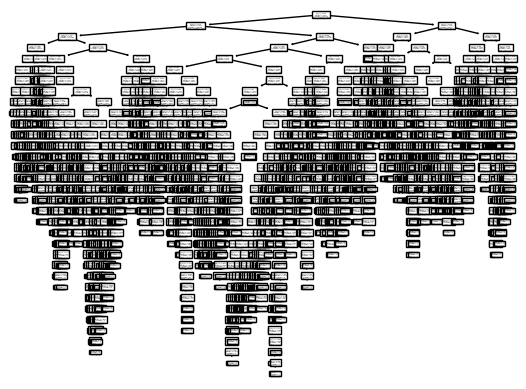

In [188]:
import matplotlib.pyplot as plt
import sklearn.tree as tree
tree.plot_tree(classifier)
plt.show()